# Breast Cancer Classification
### Written by Leo Carrico


This project is dedicated to using a Breast Cancer dataset pulled from Sci-Kit Learn to predict whether a tumor is malignant or benign.</br>
We will be using three different linear classifiers to categorize our dataset:
* Perceptron
* Logistic Regression
* Support Vector Machine

Our focus still be mostly on the Support Vector Machine, but we will also test the base classifiers to see how they fair with this dataset.

## Importing the Data

Import all of our working modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data from sci-kit learn

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

Here are the different sections of our dataset

In [4]:
print(*list(cancer.keys()), sep=", ")

data, target, frame, target_names, DESCR, feature_names, filename


Now lets read the description of our dataset

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Lets take a minute to give our targets a quick look.

In [6]:
from collections import Counter

In [7]:
print(f"Target Names: {', '.join(cancer['target_names']) }")
print(f"Target Values: {dict(Counter(cancer['target']))}")
print(f"Target Shape: {cancer['target'].shape}")

Target Names: malignant, benign
Target Values: {0: 212, 1: 357}
Target Shape: (569,)


Lets now take a look at the data itself

In [8]:
print(f"Features for our data:\n{cancer['feature_names']}\n")
print(f"Feature shape: {cancer['data'].shape}\n")

Features for our data:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Feature shape: (569, 30)



In [9]:
# Turn our labels into a column
labels = cancer['target'].reshape(-1, 1)

# Combine our feature data with our labels
data_with_labels = np.append(cancer['data'], labels, axis=1)

# Create out column names
columns = np.append(cancer['feature_names'], ['target'])

In [10]:
# Turn the data and columns into a dataframe
df_cancer = pd.DataFrame(data_with_labels, columns=columns)
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


# Visualize the Data

We'll now use graphs and plots to visualize our data in order to broaden our current understanding of that data.

In [11]:
# Quick themeing to look pretty
sns.set_style("ticks")
sns.despine(left=True, bottom=True)
sns.set_style("white")

sns.set_palette("pastel")
sns.color_palette("pastel")


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

<Figure size 432x288 with 0 Axes>

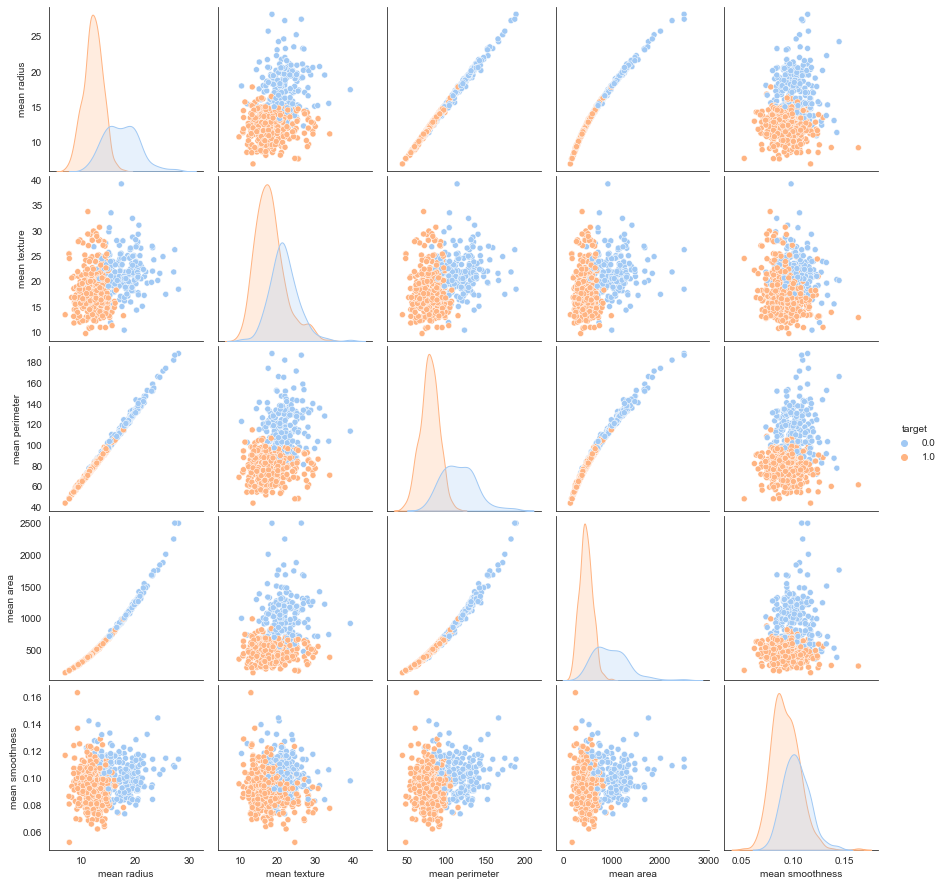

In [12]:
sns.pairplot(df_cancer, hue='target', vars=df_cancer.columns[:5])

<AxesSubplot:xlabel='target', ylabel='count'>

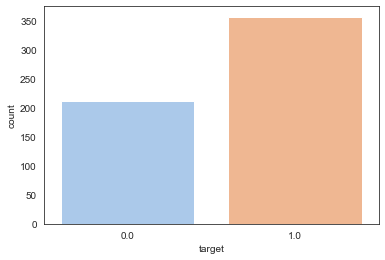

In [76]:
sns.countplot(x='target', data=df_cancer)

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

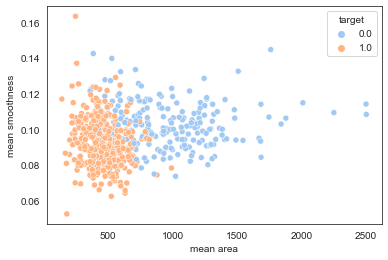

In [14]:
sns.scatterplot(x = 'mean area', y='mean smoothness', hue='target', data=)

<AxesSubplot:>

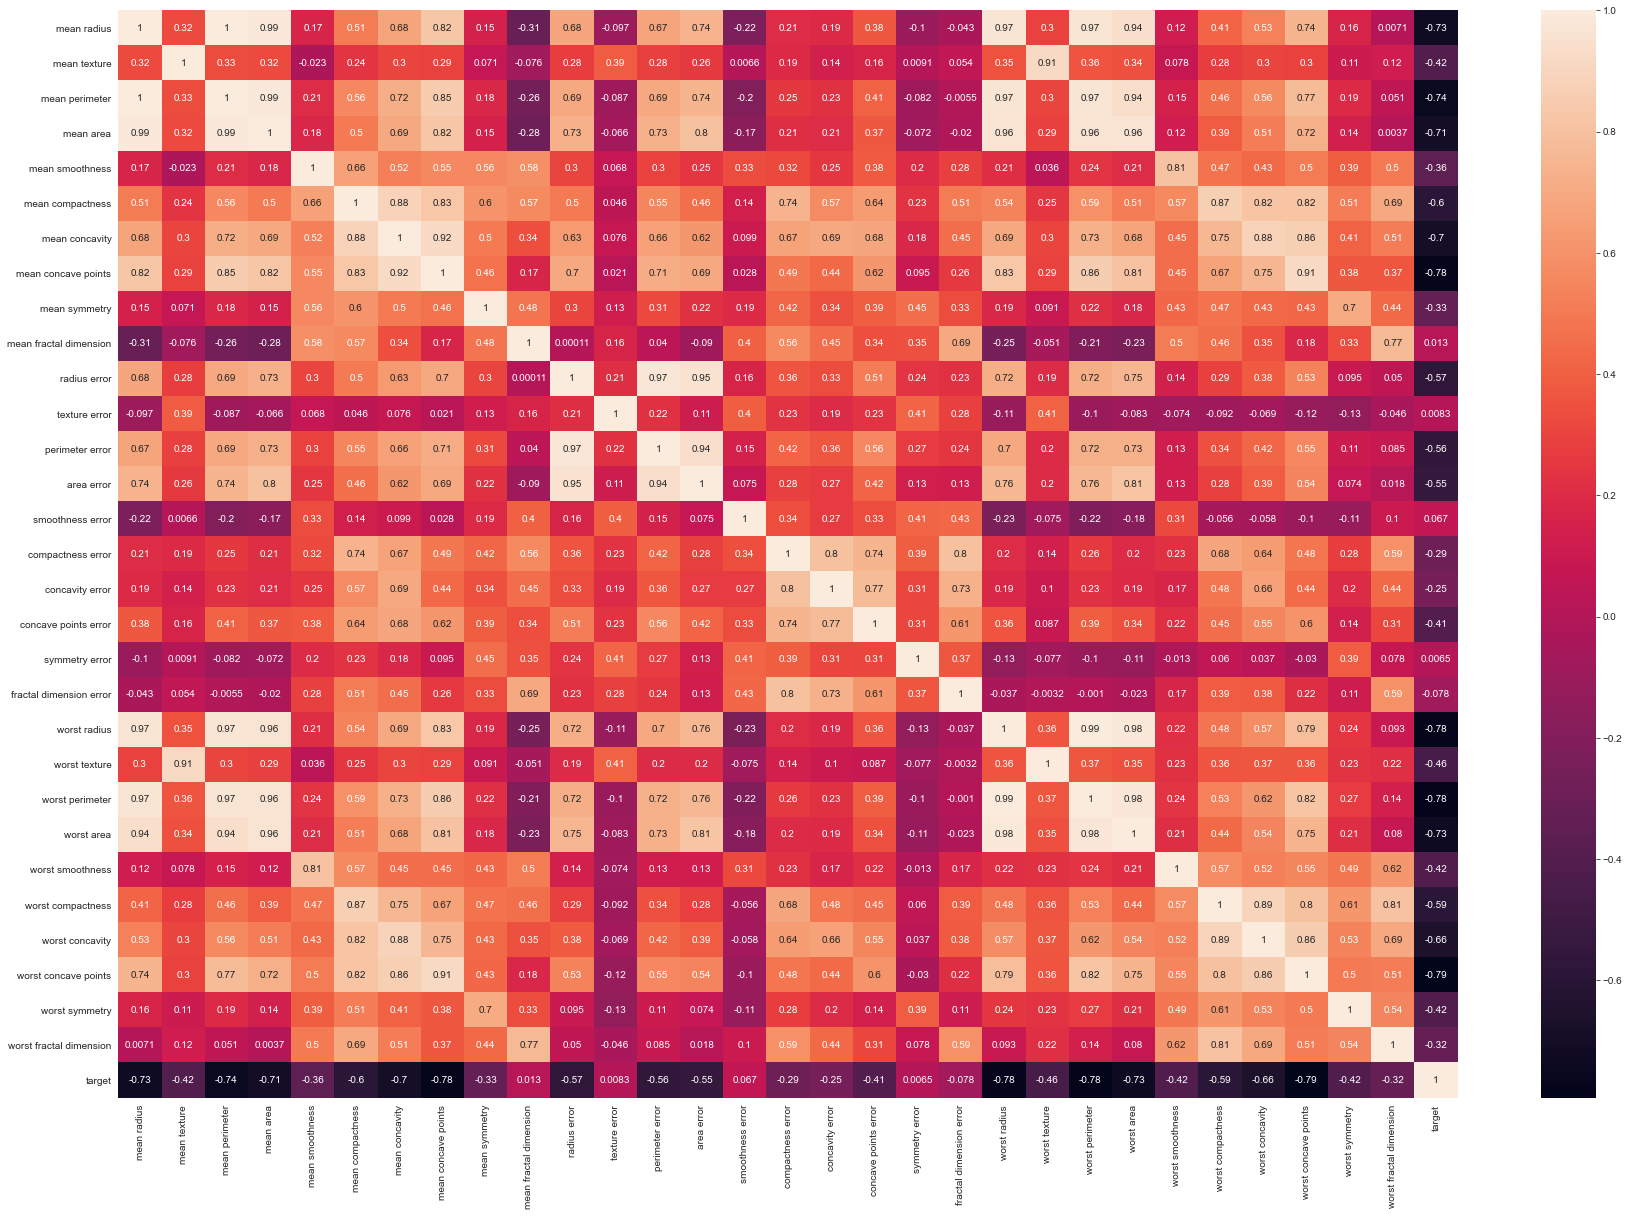

In [15]:
plt.figure(figsize=(30, 20))
sns.heatmap(df_cancer.corr(), annot=True)

## Training Our Models

Let's grab our features and labels as X and y

In [16]:
X = df_cancer.drop(['target'], axis=1)
y = df_cancer['target']

Now we can separate them into our training data and our testing data 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Here we will import our models

In [19]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Here we will create and train our Perceptron

In [20]:
p_clf = Perceptron()

In [21]:
p_clf.fit(X_train, y_train)

Perceptron()

Here we will create and train our Support Vector Machine

In [22]:
svc_clf = SVC()

In [23]:
svc_clf.fit(X_train, y_train)

SVC()

Here we will create and train our Logistic Regression

In [24]:
lr_clf = LogisticRegression(max_iter=1e4)

In [25]:
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000.0)

## Evaluating Our Models

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

Let's start with evaluating our Perceptron

<AxesSubplot:>

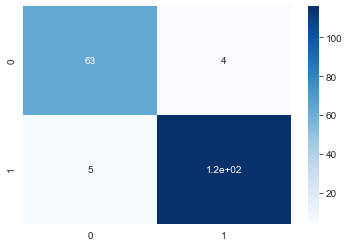

In [27]:
y_pred = p_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")

Now let's evaluate our Support Vector Machine

<AxesSubplot:>

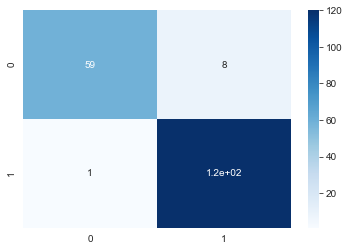

In [28]:
y_pred = svc_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")

Finally we can evaluate our Logistic Regression

<AxesSubplot:>

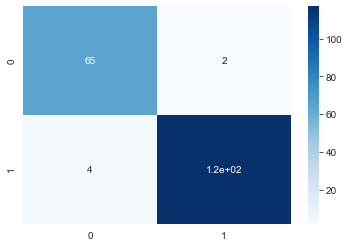

In [29]:
y_pred = lr_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")

## Optimizing Our Support Vector Machine

Normalizing our dataset

In [30]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [31]:
X_train_scaled[X_train_scaled.columns[:5]].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
count,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.318097,0.321348,0.313924,0.210826,0.332308
std,0.175549,0.143602,0.175743,0.156400,0.136914
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.196826,0.218465,0.194064,0.107526,0.227475
50%,0.269798,0.308421,0.266053,0.158114,0.318367
75%,0.413292,0.401082,0.415668,0.270145,0.417187
max,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

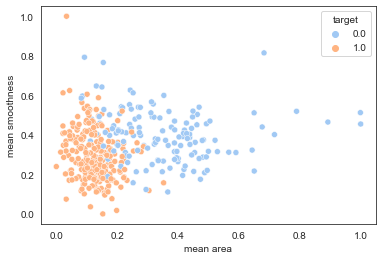

In [32]:
sns.scatterplot(x=X_train_scaled['mean area'], y=X_train_scaled['mean smoothness'], hue=y_train)

In [33]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

Search for the optimal parameters with grid search

In [34]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {'C':[0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma':['scale'], 'kernel':['rbf']}
svc_clf = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

In [66]:
svc_clf.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': ['scale'], 'kernel': ['rbf']},
             verbose=2)

In [67]:
svc_clf.best_params_

{'C': 10000, 'gamma': 'scale', 'kernel': 'rbf'}

## Conclusion

<AxesSubplot:>

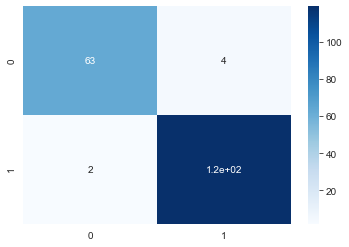

In [68]:
y_pred = svc_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96        67
         1.0       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In conclusion, we are able to use an SVM to classify tumors into Malignant or Benign with an accuracy of about 97%.<br>
Machine Learning in this case has the potentional to assist doctors in their predictions of whether or not a tumor can be dangerous or harmful to an individual.<br>
A potentional future study could to be to use Computer Vision to generate and pipe features directly into a a classifier that takes numerical features. 